## Project Title: 
### Twitter NLP Analysis

## Creator: 
### Daniel Ramirez Jr.

## Project Type:

### Personal

## 1. Problem Introduction
---

Sneakers have become an asset that can be traded as if they are stocks, bonds, and commondities. There are several factors that drive the post-retail price of a sneaker, but a main factor is how the public perceives the sneaker itself. Humans have this tendency to belong to a certain community and look like their fellow members. Thus, if an important person in one's community is pitching a certain look, the community is likely to mimick that style.

In the past, the hype on the streets was what made a sneaker popular, but now the hype of the streets has transitioned into social media platforms such as Instagram and Twitter. The goal of this analysis is to provide descriptive analytics regarding a sneaker that is talked about on Twitter. The two main questions that this analysis will answer are: 

1. Can hype be measured?

2. If hype can be measured, can it help predict the price of a post-retail sneaker price? 

## 2. Dataset
---

In [106]:
#required libraries for analysis
#twitter library was used to connect to the Standard Twitter API and pull data
import twitter

#import pandas for data manipulation
import pandas as pd

#stat functions
from statistics import mean
from statistics import median
from statistics import stdev

#used for saving files and manipulating data structures
import json

#used for descriptive statistics section
import matplotlib.pyplot as plt

#import the word cloud functions
from wordcloud import WordCloud, STOPWORDS


### 2.1. Data Source

To support the argument that social media analytics can provide value to music managers and artists, the project analyzed Tweets that contained the name of a specific shoe that is


The Standard Twitter API had a limit on how many Tweets could be gathered; around 500,000 Tweets per month. Other restrictions were related to time constraints. For example, to pull data from the Standard Twitter API, one has to make a request to the API, however, all request windows were 15 minutes in length, meaning that one had to be mindful on how many Tweets were being pulled and when.

### 2.2. Authorization of Twitter Developer Account

This section created a function that connected the Twitter Developer Account information with the Standard Twitter API. In other words, the Standard Twitter API authorized the account to ensure it could provide data.

In [91]:
#function that authorizes the twitter account
#parameters include the user's personal information provided in the developer account portal
def oauth_login(CONSUMER_KEY,CONSUMER_SECRET,OAUTH_TOKEN,OAUTH_TOKEN_SECRET):
    # See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
    # for more information on Twitter's OAuth implementation.
    #authorizing your request
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    #connects you to the api
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

In [92]:
#key values
CONSUMER_KEY = '42oR4YzLBYPJE0P6fz3Tldal3'
CONSUMER_SECRET = 'HHRMTiqYib6VoV7qGi6jSSQZigOMz2tGzFyUb5Smpjf1CAfh6h'
OAUTH_TOKEN = '824794621180047360-uQdy9rbC1bAFZCAonxZWJh33ZZEIkJb'
OAUTH_TOKEN_SECRET = 'tS6LJoa0B9UlukJoosJVQDy67COoHq2dsV2hShiMceleN'

# store the function to the twitter_api variable
twitter_api = oauth_login(CONSUMER_KEY,CONSUMER_SECRET,OAUTH_TOKEN,OAUTH_TOKEN_SECRET)    

print(twitter_api)

### 2.3. Pulling Data From The Standard Twitter API

To pull a specific amount of Tweets, based on a certain criteria, the twitter_search function was created. The parameters include the variable that contains the user's permission to pull from the Twitter API (twitter_api), the search query (q), the total amount of tweets to pull (max_results), and the keyword arguments variable (** kw) because it is not certain how many arguments are goingt to be placed in the function calling.

The function's object was to pull Tweets that contained the name 'Ariana Grande' using Twitter's "search.tweets" function. Search.tweets returns a large JSON structure that has a key labeled 'statuses'. This key holds a value that contains a list of all the dictionaries that pertain to the Tweets pulled from the Twitter API. 

In [93]:
#function that searches for what the user asks
def twitter_search(twitter_api, q, max_results=100, **kw):
    # See https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets
    # and https://developer.twitter.com/en/docs/tweets/search/guides/standard-operators
    # for details on advanced search criteria that may be useful for 
    # keyword arguments
    
    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets    
    #Returns tweets created before the given date. Date should be formatted as YYYY-MM-DD. 
    #Keep in mind that the search index has a 7-day limit. 
    #In other words, no tweets will be found for a date older than one week.
    
    #search_results is the variable that will hold the values that are returned by the search function from the twitter_api library
    search_results = twitter_api.search.tweets(q=q,lang='en',count=100, **kw)
    
    #assign the statuses variable to the list of Tweets pulled from the API 
    statuses = search_results['statuses']
    
    # Iterate through batches of results by following the cursor until we
    # reach the desired number of results, keeping in mind that OAuth users
    # can "only" make 180 search queries per 15-minute interval. See
    # https://developer.twitter.com/en/docs/basics/rate-limits
    # for details. A reasonable number of results is ~1000, although
    # that number of results may not exist for all queries.
    
    # Enforce a reasonable limit
    max_results = min(1000, max_results)
    
    for _ in range(10): # 10*100 = 1000
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError as e: # No more results when next_results doesn't exist
            break
            
        # Create a dictionary from next_results, which has the following form:
        # ?max_id=313519052523986943&q=NCAA&include_entities=1
        kwargs = dict([ kv.split('=') 
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results: 
            break
            
    return statuses

In [95]:
#This cell calls the twitter api and stores the data in the variable statutes; be careful be careful when using it. You could exceed the API limit by accident
#########################################################################

#assign the sneaker name to a variable
sneaker_name = 'Saquon Barkley OR Nike Air Trainer 3'

#exclude replies, retweets, urls; just original tweets
#urls are excluded because the same tweets are provided but with different URLS, thus messing up the unique count
filtering_criteria = '-filter:links -filter:retweets -is:reply'

#build the query that looks for the sneaker name and that excludes replies, retweets,urls
query = sneaker_name + filtering_criteria

#variable below makes the request and stores the JSON Format aka dictionary structure
dictionary_of_tweets = twitter_search(twitter_api, query)

#print tweet count
print('Tweet Count: ',len(dictionary_of_tweets))
print()

#display the list of dictionaries that contain all the tweet information returned by the twitter API
dictionary_of_tweets

Tweet Count:  3



[{'created_at': 'Fri Oct 22 02:49:21 +0000 2021',
  'id': 1451380125170221060,
  'id_str': '1451380125170221060',
  'text': "Need those Saquon Barkley Air Trainer 3's tmrw.",
  'truncated': False,
  'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 17879511,
   'id_str': '17879511',
   'name': 'Mark Exit Goodchild',
   'screen_name': 'exit1200',
   'location': 'Los Angeles, CA',
   'description': 'Record Maker + A&R',
   'url': 'https://t.co/nxKU00wWaG',
   'entities': {'url': {'urls': [{'url': 'https://t.co/nxKU00wWaG',
       'expanded_url': 'http://exit1200.com',
       'display_url': 'exit1200.com',
       'indices': 

### 2.4.  Storing the Unstructured Data From The Standard Twitter API

Given that Twitter Data is valuable and the API request was limited, it was important to save the raw data immediately in case the notebook file crashes or is lost somehow.


In [96]:
#save the raw data into a file on your computer

#the last section of the path is the new name of the file
raw_file_name = 'rawTwitterData.json'

#save the raw data to the following path location
path = 'C:/Users/Papi/Documents/Data Science Projects/Data_Science_Projects/Twitter Data Mining/'

full_path = path +raw_file_name

#dump the list of dictionaries into a new json file in the path above 
with open(full_path, 'w') as fout:
    json.dump(dictionary_of_tweets, fout)



### 2.5. Pre-Processing Unstructured Twitter Data

The Standard Twitter API provided a siginificant amount of data points that were irrelevant to the scope of the project's analysis. The project was specifically interested in the following variables from each Tweet pulled:

- User screen name
- Text content of Tweet
- Amount of followers the user has
- Date of the Tweet
- Amount of likes the Tweet received  
- Amount of Retweets the Tweet received  

In [97]:
#this function gathers the relevant information that is pulled from the twitter_search function 
def relevantTweetInfo(raw_dictionary):
    #create the list where all the dictionary of tweets are going to be stored
    tweets = []

    # create a json structure for this so that we can get corresponding attributes from the twitter data
    #the points of interest of the twitter data are as follows:
    
    #it is important to know who is talking about the sneaker and how influencial they may be. This can be found by the follower count and how the public reaction to thier tweet
    filtered_tweets = {  
        'Screen_Name': 0,
        'Tweet': 0,
        'Followers':0,
        'Date':0,
        'Likes':0,
        'Retweets':0
        }

    #create a for loop that goes into each
    for status in raw_dictionary:

        #takes the dictionary values from the raw data and assigns it to the clean dictionary
        filtered_tweets['Screen_Name'] = status['user']['screen_name']
        filtered_tweets['Tweet'] = status['text']
        filtered_tweets['Followers'] = status['user']['followers_count']
        filtered_tweets['Date'] = status['user']['created_at']
        filtered_tweets['Likes'] = status['favorite_count']
        filtered_tweets['Retweets'] = status['retweet_count']

        #appends the dictionary, that pertains to a specific tweet, to the list_of_random_tweets
        tweets.append(filtered_tweets.copy())
    
    #return the list of dictionaries that contain the relevant information that will be used for analysis
    return tweets


In [98]:
#test the function that takes the relevant information
test_relevantTweetInfo = relevantTweetInfo(dictionary_of_tweets)
print('Tweet Count: ',len(test_relevantTweetInfo))
print()
test_relevantTweetInfo

Tweet Count:  3



[{'Screen_Name': 'exit1200',
  'Tweet': "Need those Saquon Barkley Air Trainer 3's tmrw.",
  'Followers': 3380,
  'Date': 'Thu Dec 04 21:18:41 +0000 2008',
  'Likes': 0,
  'Retweets': 0},
 {'Screen_Name': 'paulhamlin_',
  'Tweet': '@YoungAri_Gold How you feel about the Saquon Nike air Trainer 3’s that are coming out',
  'Followers': 340,
  'Date': 'Wed Apr 11 01:06:54 +0000 2012',
  'Likes': 1,
  'Retweets': 0},
 {'Screen_Name': 'lil_ralphie787',
  'Tweet': '@SOLELINKS  did the air trainer 3 Saquon Barkley’s get pushed back ????',
  'Followers': 14,
  'Date': 'Tue Apr 08 03:48:01 +0000 2014',
  'Likes': 8,
  'Retweets': 0}]

### 2.6. Storing the Processed Data From The Standard Twitter API

The cleansed, processed data was saved in the case that something were to occur.

In [99]:
#save the relevant data to the following location

#the last section of the path is the new name of the file
clean_file_name = 'TwitterData.json'

#save the raw data to the following path location

clean_path = path + clean_file_name

#dump the list of dictionaries into a new json file in the path above 
with open(clean_path, 'w') as fout:
    json.dump(test_relevantTweetInfo, fout)

### 2.7. Retrieving Unique Tweets
This section derives unique tweets, and their respective characteristics, from the list of dictionaries that contains random timeframes, users, locations, and duplicated tweets that are returned by the Standard Twitter API. 

In [100]:
#function that provides a list of list that contain unique tweets and their relevant characteristics such as the date, username, follower count, and retweet count of that specific unique tweet
def uniqueTweetInformation(list_of_dictionaries):
    #master dictionary that will contain the relevant information of the unique tweets in the dataset (keys are the same as last dictionary and values are lists)
    master_dictionary = {  
        'Screen_Name': 0,
        'Tweet': '',
        'Followers':0,
        'Date':0,
        'Likes':0,
        'Retweets':0
        }
    
    #count the tweets that were identical in the dataset, both tweets and retweets because duplicates will throw off our analysis
    #list that only contains unique dictionary tweets (list of unique dictionary tweets)
    unique_tweets = []
    
    #list that contains unique text (list of unique text/string)
    unique_text = []
    
    #loop through each tweet dictionary in the list of dictionaries
    for tweet in list_of_dictionaries:
        #if the tweet is not in the list of unique texts then add it to the list
        if tweet.get('Tweet') not in unique_text:
            unique_text.append(tweet.get('Tweet'))
            unique_tweets.append(tweet)    
    
    ###############################################################
    #now that there a list of unique text, the numeric values can be stored
    #if numeric values were stored for reoccuring tweets, the analysis would over value certain tweets

    #lists where the remaining attributes will be stored
    screen_names = []
    followers = []    
    string_dates = []
    retweet_count = []
    likes = []
    
    #loop through each unique tweet in the list of unique tweets
    for uniqueTweet in unique_tweets:
        #key_list has the attributes of the tweet
        # key_list looks like this ['Screen_Name', 'Tweet', 'Followers', 'Date', 'Likes', 'Retweets']
        key_list = list(uniqueTweet.keys())

        #assign values from unique_tweets to the following variables
        name_section = uniqueTweet[key_list[0]]
        follower_section = uniqueTweet[key_list[2]]
        date_section = uniqueTweet[key_list[3]]
        likes_section = uniqueTweet[key_list[4]]
        retweet_section = uniqueTweet[key_list[5]]

        #append those values to the corresponding lists
        screen_names.append(name_section)
        followers.append(follower_section)
        string_dates.append(date_section)
        likes.append(likes_section)
        retweet_count.append(retweet_section)
    
    #loop has ended and the list are ready to be appended to the master list
    #append the respective lists into the master list:
    master_dictionary['Screen_Name'] = screen_names
    master_dictionary['Tweet'] = unique_text
    master_dictionary['Followers'] = followers
    master_dictionary['Date'] = string_dates
    master_dictionary['Likes'] = likes
    master_dictionary['Retweets'] = retweet_count

    ###############################################################
        
    #printing out how many tweets are unique        
    total_tweets_pulled = len(list_of_dictionaries)
    total_unique_tweets = len(unique_tweets)
    unique_ratio = round((total_unique_tweets/total_tweets_pulled)*100)

    print('Amount of Total Tweets:',total_tweets_pulled)       
    print('Amount of Unique Tweets:',total_unique_tweets)
    print('Unique Tweets Percentage: %i'%(unique_ratio))
    
    #return the master list/hashtable
    return master_dictionary

In [101]:
test_uniqueTweetInformation = uniqueTweetInformation(test_relevantTweetInfo)
test_uniqueTweetInformation

Amount of Total Tweets: 3
Amount of Unique Tweets: 3
Unique Tweets Percentage: 100


{'Screen_Name': ['exit1200', 'paulhamlin_', 'lil_ralphie787'],
 'Tweet': ["Need those Saquon Barkley Air Trainer 3's tmrw.",
  '@YoungAri_Gold How you feel about the Saquon Nike air Trainer 3’s that are coming out',
  '@SOLELINKS  did the air trainer 3 Saquon Barkley’s get pushed back ????'],
 'Followers': [3380, 340, 14],
 'Date': ['Thu Dec 04 21:18:41 +0000 2008',
  'Wed Apr 11 01:06:54 +0000 2012',
  'Tue Apr 08 03:48:01 +0000 2014'],
 'Likes': [0, 1, 8],
 'Retweets': [0, 0, 0]}

### Attention
The code below should only be executed if a large file has already been cleaned and ready to be analyzed


In [48]:
#code below should only be executed if a large file has already been cleaned and ready to be analyzed
#it is a json file that was created by merging all the json files pulled using the code in the boxes above
import json
path = 'C:/Users/Papi/Documents/INFO 440/Social Media Mining/ArianaTweetData.json'

file = open(path,encoding="utf8")
  
# returns JSON object as a dictionary
twitterData = json.load(file)
list_of_random_tweets = twitterData
list_of_random_tweets

[{'Screen_Name': '4BLACKT',
  'Tweet': 'Check 100% —10% - The weeknd10% - The 197510% - Fiding hope10% - Doja cat10% - Chase atlantic10% - Ariana gr… https://t.co/CWMOU62MsF',
  'Followers': 341,
  'Date': 'Mon Apr 26 12:19:20 +0000 2021',
  'Likes': 0,
  'Retweets': 0},
 {'Screen_Name': 'claudiacoelho45',
  'Tweet': 'RT @trechosbads: needy — Ariana Grande  https://t.co/JrmKLuhilX',
  'Followers': 2705,
  'Date': 'Sun Aug 10 21:05:51 +0000 2014',
  'Likes': 0,
  'Retweets': 5326},
 {'Screen_Name': 'hyenaa__',
  'Tweet': 'RT @najaeminpics: 210530 NCT DREAM Video Call Fansign©sehunsbabyeelaine#JAEMIN #재민 #NCT재민: Jaemin likes Ariana Grande🐰: Yes: She got…',
  'Followers': 131,
  'Date': 'Thu May 11 13:21:11 +0000 2017',
  'Likes': 0,
  'Retweets': 2831},
 {'Screen_Name': 'mysmilingmechi',
  'Tweet': "RT @onlydoja: everyone shut up here's ariana grande in 4k https://t.co/qzJct0x1Ue",
  'Followers': 2407,
  'Date': 'Wed Mar 05 13:34:33 +0000 2014',
  'Likes': 0,
  'Retweets': 1871},
 {'Scre

### Block Ends


## 3. Descriptive Analytics
---

### 3.1. Data Distribution

In [102]:
#convert the dictionary into a readable dataframe
tweet_table = pd.DataFrame(test_uniqueTweetInformation)
tweet_table.head(6)

,Screen_Name,Tweet,Followers,Date,Likes,Retweets
0,exit1200,Need those Saquon Barkley Air Trainer 3's tmrw.,3380,Thu Dec 04 21:18:41 +0000 2008,0,0
1,paulhamlin_,@YoungAri_Gold How you feel about the Saquon N...,340,Wed Apr 11 01:06:54 +0000 2012,1,0
2,lil_ralphie787,@SOLELINKS did the air trainer 3 Saquon Barkl...,14,Tue Apr 08 03:48:01 +0000 2014,8,0


In [118]:
#create a function that displays the distribution of the numerical data
#historgrams and boxplots can be used here
#might have to log transform some given that some people have significantly more followers than others

#Break down of the following that our users had in the sample
print('Influence/Following Distribution in Sample:')
print('-----------------------------------------')
tweet_table['Followers'].describe()


# print()
# print('The Average follower count:',avg_Followers,'\n'
# ,'The Median follower count:',med_Followers,'\n','The highest follower count:',max_Followers,'\n',
#       'The lowest follower count:',min_Followers)    

Influence/Following Distribution in Sample:
-----------------------------------------


count       3.000000
mean     1244.666667
std      1856.422725
min        14.000000
25%       177.000000
50%       340.000000
75%      1860.000000
max      3380.000000
Name: Followers, dtype: float64

In [105]:
print(tweet_table.iloc[2,1])


@SOLELINKS  did the air trainer 3 Saquon Barkley’s get pushed back ????


In [ ]:
dictionary_tweet_value

### 3.2. Word Cloud

A word cloud can be used to visually represent the most common words in a dataset. Understanding the most popular words used in conjunction with the name of a sneaker can provide an investor with a preliminary understanding of how the general public might feel about the sneaker

In [113]:
test_uniqueTweetInformation['Tweet']

["Need those Saquon Barkley Air Trainer 3's tmrw.",
 '@YoungAri_Gold How you feel about the Saquon Nike air Trainer 3’s that are coming out',
 '@SOLELINKS  did the air trainer 3 Saquon Barkley’s get pushed back ????']

In [116]:
#Show the most frequent words used in the dataset using a word cloud
# Define a function to plot word cloud
def plot_cloud(dictionary_tweet_value):
    #to do this, join all the string elements in the list into one large string
    #specify how to join them, in this case by space
    cloud_string = " "  

    #use the list from the master dictionary
    cloud_string = cloud_string.join(dictionary_tweet_value)
    
    print('Cloud String:')
    print(cloud_string)
    print()
    #generate a wordCloud with the function below
    wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(cloud_string)
    
    # Set figure size
    plt.figure(figsize=(10, 20))
    
    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off");

Cloud String:
Need those Saquon Barkley Air Trainer 3's tmrw. @YoungAri_Gold How you feel about the Saquon Nike air Trainer 3’s that are coming out @SOLELINKS  did the air trainer 3 Saquon Barkley’s get pushed back ????



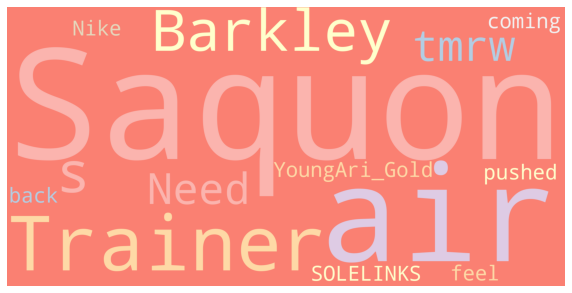

In [117]:
test_plot_cloud = plot_cloud(test_uniqueTweetInformation['Tweet'])

In [49]:
# #Since the dictionaries have several slots of information, it is necessary to store each data into a specific list
# #tweets will be inputed into the list below
# tweets = []
# i = 0
# for attribute in list_of_random_tweets:
#     #append the section the dictionary that contains the Tweet data
#     tweets.append(list_of_random_tweets[i].get('Tweet'))
#     i = i +1

# #Check to see if it stored correctly    
# print(tweets[0])
# print()
# print(tweets[1])

Check 100% —10% - The weeknd10% - The 197510% - Fiding hope10% - Doja cat10% - Chase atlantic10% - Ariana gr… https://t.co/CWMOU62MsF

RT @trechosbads: needy — Ariana Grande  https://t.co/JrmKLuhilX


In [50]:
#begin describing the most popular tweets in the dataset (these will most likley all be retweets)

#Counter library will give us frequency information
from collections import Counter
import numpy as np

#SentimentIntensityAnalyzer is python's library that can peform sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#create an instance of Counter and input the list of tweets that was created previously
count = Counter(tweets)

#we want a count of all the occurences for each Tweet that is pulled
display_amount = len(tweets)

#the most_common method returns a list of tuples that are formatted as follows (tweet, frequency count) only retrieves a portion of tweets
most_common_retweets = count.most_common(display_amount)

#this will be used for the sentiment of the premliminary results (we will use our own model in the analytical portion)
analyzer = SentimentIntensityAnalyzer()


#Descriptive Analytics section
print('Out of the %i Tweets in the dataset, these were the 5 Most common:'%(display_amount))
# print('-------------------------------------------------------------------')
counter=0
#loop through the entire list that contains the tuple of all the tweets 
for tweet in most_common_retweets:
    counter=counter +1
        
    #It is only necessary to get the top 5 most frequent tweets
    if counter <6:
        print()
        
        #prints ('1. to 5.')
        print(counter,'.')
        print()
        
        #the polarity_scores method calculates a sentiment score for the text provided within the parenthesis
        sentiment = analyzer.polarity_scores(tweet[0])
        
        #format the description in an organized manner
        print('The following Tweet appeared in the sample set',tweet[1],'times and had a vader sentiment score of:',round(sentiment['compound'],2)) 
        print()
        print(tweet[0])



Out of the 4800 Tweets in the dataset, these were the 5 Most common:

1 .

The following Tweet appeared in the sample set 711 times and had a vader sentiment score of: 0.88

RT @ariisgng: are you proud of ariana grande? yes              yes                 yes 👇              👇                 👇

2 .

The following Tweet appeared in the sample set 637 times and had a vader sentiment score of: 0.2

RT @TXT__News: .@TXT_members 0X1=LOVESONG currently at #2 on Top Songs iTunes Worldwide next to #1. Butter by BTS and before #3. Save…

3 .

The following Tweet appeared in the sample set 99 times and had a vader sentiment score of: 0.0

RT @nastyysarah: pov : ur at a ariana grande concert...a thread ! https://t.co/LgcU0HPU72

4 .

The following Tweet appeared in the sample set 93 times and had a vader sentiment score of: 0.67

RT @RepublicRecords: She’s Perfect Right Now for Top 40: How @ArianaGrande Made History at Pop RadioREAD via @billboard ↓https://t.co/…

5 .

The following Tweet appear

Sample Statistics
-----------------

Unique Tweets in Sample: 693

Average Amount of Likes per Tweet: 1.06
Median Amount of Likes per Tweet: 0
Average Amount of Retweets per Tweet: 549.13
Median Amount of Retweets per Tweet: 0


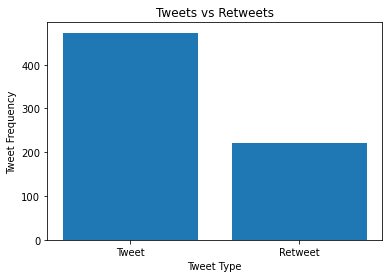

In [57]:
#now that there a list of unique tweets, the numeric values can be stored
#if numeric values were stored for reoccuring tweets, the analysis would over value certain tweets
from statistics import median
from statistics import mean
import matplotlib.pyplot as plt

#lists where the remaining attributes will be stored
Followers = []    
string_dates = []
retweet_count = []
likes = []

for uniqueTweet in unique_tweets:
    
    #key_list has the attributes of the tweet
    # key_list looks like this ['Screen_Name', 'Tweet', 'Followers', 'Date', 'Likes', 'Retweets']
    key_list = list(uniqueTweet.keys())
    
    #assign values from unique_tweets to the following variables
    follower_section = uniqueTweet[key_list[2]]
    date_section = uniqueTweet[key_list[3]]
    likes_section = uniqueTweet[key_list[4]]
    retweet_section = uniqueTweet[key_list[5]]
    
    #append those values to the corresponding lists
    Followers.append(follower_section)
    string_dates.append(date_section)
    likes.append(likes_section)
    retweet_count.append(retweet_section)

#break down of how influencial the users in the sample are
avg_Followers = round(mean(Followers),0)
med_Followers = median(Followers)
max_Followers = max(Followers)
min_Followers = min(Followers)

#calculate avg likes per tweet
avg_likes = round(mean(likes),2)

#calculate med likes per tweet
med_likes = round(median(likes),2)

#calculate avg retweets per tweet
avg_retweet_count = round(mean(retweet_count),2)

#calculate median retweets per tweets
med_retweet_count = round(median(retweet_count),2)

    
#interface
print('Sample Statistics')
print('-'*len('Sample Statistics'))
print()

print('Unique Tweets in Sample:',len(unique_tweets))
print()
print('Average Amount of Likes per Tweet:',avg_likes)
print('Median Amount of Likes per Tweet:',med_likes)
print('Average Amount of Retweets per Tweet:',avg_retweet_count)
print('Median Amount of Retweets per Tweet:',med_retweet_count)


#breakdown of which unique tweets were retweets
retweet_instances = []

for unique_retweet in unique_text:
    if unique_retweet[:2] == "RT" or unique_retweet[:2] == 'rt':
        retweet_instances.append(unique_retweet)
        
amount_of_unique_retweets = len(retweet_instances)
amount_of_unique_ogtweets = len(unique_tweets) - amount_of_unique_retweets

graph_values = [amount_of_unique_ogtweets,amount_of_unique_retweets]
tweet_label = ['Tweet','Retweet']

plt.bar(tweet_label,graph_values)    
plt.title('Tweets vs Retweets')
plt.xlabel('Tweet Type')
plt.ylabel('Tweet Frequency')
plt.show()





In [58]:
#calculate the date range of the string_dates
#it is important to show the date of the tweets
dates = []
for date in string_dates:
    int_date = int(date[-5:])
    dates.append(int_date)

#break down how the unique tweets look like and the basic statistics of them
print('Examples of Unique Tweets:')
print('-------------------------')
print()
interator = 1
for tweet in unique_tweets[:5]:
    print(interator,'.\n')
    print('Name:',unique_tweets[interator].get('Screen_Name'))
    print()
    print('Tweet:',unique_tweets[interator].get('Tweet'))
    print()
    print('Likes:',unique_tweets[interator].get('Likes'))
    print('Followers:',unique_tweets[interator].get('Followers'))
    print('Retweets:',unique_tweets[interator].get('Retweets'))
    print('Year:',dates[interator])
    print()
    
    interator = interator+1
    


Examples of Unique Tweets:
-------------------------

1 .

Name: claudiacoelho45

Tweet: RT @trechosbads: needy — Ariana Grande  https://t.co/JrmKLuhilX

Likes: 0
Followers: 2705
Retweets: 5326
Year: 2014

2 .

Name: hyenaa__

Tweet: RT @najaeminpics: 210530 NCT DREAM Video Call Fansign©sehunsbabyeelaine#JAEMIN #재민 #NCT재민: Jaemin likes Ariana Grande🐰: Yes: She got…

Likes: 0
Followers: 131
Retweets: 2831
Year: 2017

3 .

Name: mysmilingmechi

Tweet: RT @onlydoja: everyone shut up here's ariana grande in 4k https://t.co/qzJct0x1Ue

Likes: 0
Followers: 2407
Retweets: 1871
Year: 2014

4 .

Name: annkickcat

Tweet: RT @VogueRunway: .@ArianaGrande wore @VeraWang for her intimate wedding to Dalton Gomez at her Montecito home. See more exclusive images fr…

Likes: 0
Followers: 63
Retweets: 7
Year: 2017

5 .

Name: 34Plus35ArianaG

Tweet: RT @gainsarianafans: coloring images of ariana grande is so fun https://t.co/gog0qGROH9

Likes: 0
Followers: 1234
Retweets: 26
Year: 2019



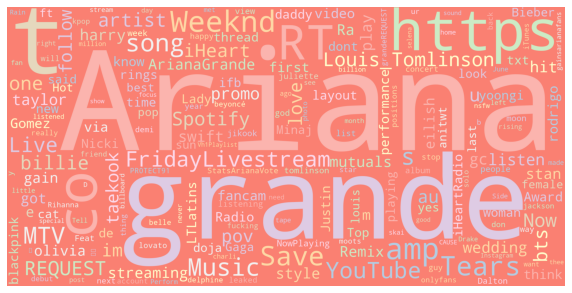

In [59]:
# #Show the most frequent words used in the dataset using a word cloud
# #to do this, join all the string elements in the list into one large string

# #specify how to join them, in this case by space
# s = " "  
# s = s.join(unique_text)
      
# # Define a function to plot word cloud
# def plot_cloud(wordcloud):
#     # Set figure size
#     plt.figure(figsize=(10, 20))
#     # Display image
#     plt.imshow(wordcloud) 
#     # No axis details
#     plt.axis("off");

# from wordcloud import WordCloud, STOPWORDS
# # Generate word cloud
# wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(s)
# # Plot
# plot_cloud(wordcloud)

Age Breakdown of Tweets:
-------------------------

The oldest year in our sample was 2008
The most recent year in our sample was 2021



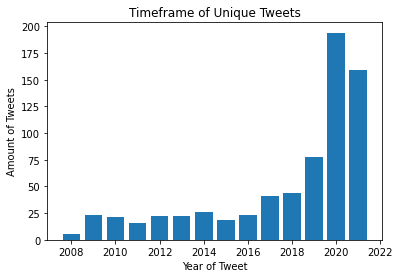

In [60]:
#show how the age of the tweets are distributed in the dataset
print('Age Breakdown of Tweets:')
print('-------------------------')
print()
print('The oldest year in our sample was',min(dates))    
print('The most recent year in our sample was',max(dates))
print()

#create a bar graph to see how many of the tweets were associated with what year 

#this for loop creates a list with the proper dates
date_range = []
for fecha in range(min(dates),max(dates)+1):
    date_range.append(fecha)
    
#this loop gets a count of the specific labels in the list of dates
values_for_bgraph = []
for fecha in date_range:
    year_count = dates.count(fecha)
    values_for_bgraph.append(year_count)

    
plt.bar(date_range, values_for_bgraph)    
plt.title('Timeframe of Unique Tweets')
plt.xlabel('Year of Tweet')
plt.ylabel('Amount of Tweets')
plt.show()

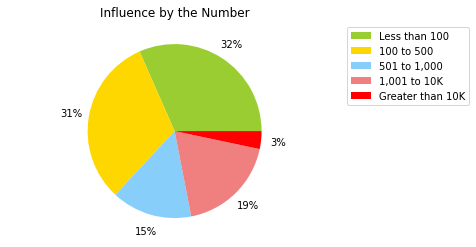

<Figure size 4000x800 with 0 Axes>

In [12]:
#to better interpret the frequency, a pie chart was created that contained similar buckets
#this will help us visualize the how influencial the users are in our sample
#if influence is big, then what they say about the artist can be very important
from matplotlib.pyplot import figure
interval1 = []
interval2 = [] 
interval3 = []
interval4 = []
interval5 = []

for follower_count in Followers:
    
    if follower_count <100:
        interval1.append(follower_count)
    
    elif follower_count >=100 and follower_count <=500:
        interval2.append(follower_count)
        
    elif follower_count>500 and follower_count<=1000:
        interval3.append(follower_count)
        
    elif follower_count>1000 and follower_count <= 10000:
        interval4.append(follower_count)
    
    else:
        interval5.append(follower_count)
 


value1 = len(interval1)
value2 = len(interval2)
value3 = len(interval3)
value4 = len(interval4)
value5 = len(interval5)


my_data = [value1,value2,value3, value4,value5]
my_labels = 'Less than 100','100 to 500','501 to 1,000','1,001 to 10K','Greater than 10K'

plt.title('Influence by the Number')
plt.axis('equal')

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red']
patches = plt.pie(my_data, colors=colors,autopct='%1.0f%%',pctdistance=1.2);

plt.legend(bbox_to_anchor=(1,1), labels=my_labels);

figure(figsize=(50, 10), dpi=80);

plt.show();

In [ ]:
#

### 4. Data Cleansing for Analysis
---
The descriptive section ends here and now the goal is to clean the Tweets from the text data located in the unique_text list that contains all the Tweets that are unique in the dataset. After cleaning, the text will undergo sentiment analysis and a breakdown of how many Tweets were positive and negative will be counted for. Moreover, the analysis will also attempt to find connections between the Tweets, specifically through key words and topics. 


In [13]:
import pandas as pd

#cleaning the text data; unique_text is a list with all unique tweets from the dataset
tweetDf = pd.DataFrame(unique_text,columns=['Text'])
tweetDf.head(5)


,Text
0,Check 100% —10% - The weeknd10% - The 197510% ...
1,RT @trechosbads: needy — Ariana Grande https:...
2,RT @najaeminpics: 210530 NCT DREAM Video Call ...
3,RT @onlydoja: everyone shut up here's ariana g...
4,RT @VogueRunway: .@ArianaGrande wore @VeraWang...


In [14]:
#returns nothing; this is where the text cleaning function lives
def textCleaner(dataFrame,dfColumn):
    
    dataFrame.dropna(inplace=True)

    #convert to lowercase
    dataFrame.loc[:,'CleanText'] = dfColumn.str.lower()
        
    #remove numbers - '\d+' refers to all digits
    dataFrame.loc[:,'CleanText'] = dataFrame.loc[:,'CleanText'].str.replace('\d+', '')    

    #remove punctuation - '[^\w\s]' refers to all punctuation marks
    dataFrame.loc[:,'CleanText'] = dataFrame.loc[:,'CleanText'].str.replace('[^\w\s]', '')
        
    #Split by Space - this creates a list
    dataFrame.loc[:,'CleanText'] = dataFrame.loc[:,'CleanText'].str.split()

    return dataFrame 

In [15]:
#apply function to the dataFrame
cleanText = textCleaner(tweetDf,tweetDf['Text'])

#Display the dataFrame
cleanText.head(5)

,Text,CleanText
0,Check 100% —10% - The weeknd10% - The 197510% ...,"[check, the, weeknd, the, fiding, hope, doja, ..."
1,RT @trechosbads: needy — Ariana Grande https:...,"[rt, trechosbads, needy, ariana, grande, https..."
2,RT @najaeminpics: 210530 NCT DREAM Video Call ...,"[rt, najaeminpics, nct, dream, video, call, fa..."
3,RT @onlydoja: everyone shut up here's ariana g...,"[rt, onlydoja, everyone, shut, up, heres, aria..."
4,RT @VogueRunway: .@ArianaGrande wore @VeraWang...,"[rt, voguerunway, arianagrande, wore, verawang..."


In [16]:
#this cell does not return any values, it only stores a clean dataframe to the variable cleanText2

#Now it's time to remove all the stopwords and specific words that might not be relevant to our analysis
import nltk

#assign a variable to a list that contains all the stopword associated with the nltk library
stopwords = nltk.corpus.stopwords.words('english')

#adding specific stopwords because they are present among many tweets and do not give valuable information
unique_stopwords = ['rt']
stopwords.extend(unique_stopwords)

#function that removes stopwords
def removeStopWords(dataFrame,stopWordList,column):
    
    trigger =  True
    master_list = []
    
    
    for sentence in column:
        
        clean_word_list = []
        
        for token in sentence:
            
            #stopwords and tweets with links will not be used in the analysis 
            #also the user @name is removed from the text as well because the focus is on the content and its sentiment
            if token not in stopwords and 'http' not in token and token != sentence[1]:
                clean_word_list.append(token)
      
        listToStr = ' '.join(map(str, clean_word_list))
        
        sentence = listToStr
        
        master_list.append(sentence)


    dataFrame['CleanText'] = master_list
    return dataFrame

#apply function to the dataFrame
cleanText2 = removeStopWords(cleanText,stopwords,cleanText['CleanText'])

In [17]:
#look at the clean data
cleanText2.head()

,Text,CleanText
0,Check 100% —10% - The weeknd10% - The 197510% ...,check weeknd fiding hope doja cat chase atlant...
1,RT @trechosbads: needy — Ariana Grande https:...,needy ariana grande
2,RT @najaeminpics: 210530 NCT DREAM Video Call ...,nct dream video call fansignsehunsbabyeelainej...
3,RT @onlydoja: everyone shut up here's ariana g...,everyone shut heres ariana grande k
4,RT @VogueRunway: .@ArianaGrande wore @VeraWang...,arianagrande wore verawang intimate wedding da...


In [18]:
#create a new dataFrame with the unique,cleaned Tweets
finalDf = pd.DataFrame(cleanText2,columns=['CleanText'])
finalDf.head(5)

,CleanText
0,check weeknd fiding hope doja cat chase atlant...
1,needy ariana grande
2,nct dream video call fansignsehunsbabyeelainej...
3,everyone shut heres ariana grande k
4,arianagrande wore verawang intimate wedding da...


### 5. Text-Analysis
---
Sentiment, Topic, and Vector Analysis. Sentiment Analysis includes the Vader Compound Score, which takes into account positive, negative, and neutral scores, and merges them together for a new score. In addition, the Net Sentiment Rate metric will be used to provide a better understanding of what the sentiment is in the dataset. A positive NSR indicator is a score above 0, while a negative NSR indicator is a score below 0. 

### 5.1 Vader Sentiment-Analysis


In [19]:
#create a new column that contains the Vader Sentiment Analysis
finalDf['Sentiment Vader Score'] = finalDf['CleanText'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
print(finalDf.shape)
finalDf.head()


(693, 2)


,CleanText,Sentiment Vader Score
0,check weeknd fiding hope doja cat chase atlant...,0.4404
1,needy ariana grande,-0.3400
2,nct dream video call fansignsehunsbabyeelainej...,0.7579
3,everyone shut heres ariana grande k,0.0000
4,arianagrande wore verawang intimate wedding da...,0.1280


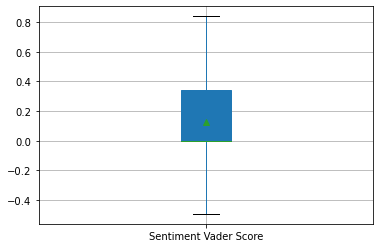

In [21]:
finalDf.boxplot(column=['Sentiment Vader Score'], patch_artist=True, grid = True,showfliers=False,showmeans=True,return_type='axes');


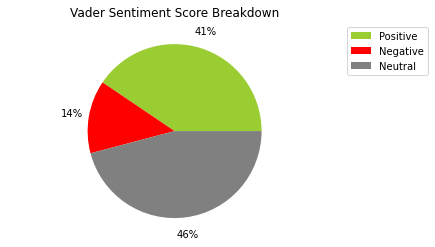

<Figure size 4000x800 with 0 Axes>

In [22]:
#show the vader sentiment score on a pie graph to show the breakdown
positive = []
negative = [] 
neutral = []

for vader in finalDf['Sentiment Vader Score']:
    
    if vader >=0.10:
        positive.append(vader)
    
    elif vader <= -0.10:
        negative.append(vader)
        
    else:
        neutral.append(vader)
 
v1 = len(positive)
v2 = len(negative)
v3 = len(neutral)


my_data = [v1,v2,v3]
my_labels = ['Positive','Negative','Neutral']

plt.title('Vader Sentiment Score Breakdown')
plt.axis('equal')

colors = ['yellowgreen', 'red', 'gray']
patches = plt.pie(my_data, colors=colors,autopct='%1.0f%%',pctdistance=1.2);

plt.legend(bbox_to_anchor=(1,1), labels=my_labels);

figure(figsize=(50, 10), dpi=80);

plt.show();

In [23]:
#Calculate NSR
positive_count = len(positive)
negative_count = len(negative)
neutral_count = len(neutral)
nsr_score = (positive_count-negative_count)/(positive_count+neutral_count)
print('The NSR score for all the unique tweets in the data set is %f.'%(round(nsr_score,2)))

The NSR score for all the unique tweets in the data set is 0.310000.


### 5.2 Topic Modeling (K-Means)


In [24]:
#Topic Analysis: What is the general gest of the tweets in the dataset?

from sklearn.feature_extraction.text import CountVectorizer
#create an instance of the CountVectorizer which will be referenced later by the fit_transform
count_vector = CountVectorizer(stop_words='english', max_df=0.9, min_df=0.01)

#line below creates an array that contains the text documents as rows and the words (aka features) as columns
#this is essentially the term-frequency matrix
df_bag = count_vector.fit_transform(finalDf['CleanText'])
print('The Term Frequency Matrix has %i documents (rows) and %i unique terms (columns).'%(df_bag.shape[0],df_bag.shape[1]))

#will be referenced later in the clustering
feature_names = count_vector.get_feature_names()

The Term Frequency Matrix has 693 documents (rows) and 118 unique terms (columns).


In [25]:
import sklearn.cluster as cl
#create an instance of the Kmeans method from the cl library and choose how many clusters to create
clusters = cl.KMeans(n_clusters=5)

#apply the data to the method
clusters.fit(df_bag)

#creates an array where rows pertain to the specific cluster and the columns pertain to the unique terms found in the tweets 
#for each cluster, the centeriod is calculated for every term
clusters.cluster_centers_
print('There are %i clusters with %i unique terms with a corresponding centeriod.'%(clusters.cluster_centers_.shape[0],clusters.cluster_centers_.shape[1]))
clusters.cluster_centers_


There are 5 clusters with 118 unique terms with a corresponding centeriod.


array([[0.        , 0.03061224, 0.        , 0.5255102 , 0.05612245,
        0.01530612, 0.04081633, 0.02040816, 0.        , 0.        ,
        0.0255102 , 0.        , 0.03571429, 0.00510204, 0.01020408,
        0.01530612, 0.02040816, 0.        , 0.02040816, 0.        ,
        0.00510204, 0.01020408, 0.05102041, 0.02040816, 0.01020408,
        0.00510204, 0.03061224, 0.02040816, 0.04591837, 0.00510204,
        0.01530612, 0.01530612, 0.01020408, 0.02040816, 0.02040816,
        0.0255102 , 0.02040816, 0.        , 0.14285714, 0.03061224,
        0.01530612, 0.03061224, 0.        , 0.        , 0.        ,
        0.04591837, 0.01530612, 0.01530612, 0.01530612, 0.        ,
        0.02040816, 0.03571429, 0.01530612, 0.        , 0.        ,
        0.05612245, 0.02040816, 0.00510204, 0.01530612, 0.02040816,
        0.01530612, 0.03571429, 0.00510204, 0.0255102 , 0.01530612,
        0.00510204, 0.00510204, 0.01020408, 0.03571429, 0.03061224,
        0.01530612, 0.02040816, 0.00510204, 0.  

In [26]:
#argsort() retrieves the position of the element that corresponds to a value in decending order
#for example, the first number given pertains to the index position where the lowest value is located in that specific list 
clusters.cluster_centers_.argsort()

array([[  0, 116,  49,  44,  43,  42,  73,  37,  75,  84,  53,  19,  17,
         97,  54, 115,   2,  11, 108,   8,   9,  13,  57,  62,  65,  66,
         72,  29,  85,  20,  99,  25,  88,  67, 110, 109,  87,  24,  21,
         14,  80,  32,  96,  83,  64,  89,  60,  86,  70, 107, 105,  78,
         81, 101,  79,  58,  47,  52,  40,  15,  31,  48,   5,  30,  46,
         33,  56,  27,  98,  23,  18,  34,  36,  16, 104,  59,  50, 114,
         71,   7, 106, 113,  74,  63,  82,  90,  35,  77,  76,  10,   1,
        100,  26,  69,  41,  39, 117,  51,  12,  61, 103,  95,  68, 112,
          6, 102,  92,  45,  93,  91,  28, 111,  94,  22,   4,  55,  38,
          3],
       [116,  42,   2,  84,  24,  53,  38,  51,  17, 108,  43,  33,   9,
         32,  54,  70,  75,  19,  82,  14, 112,  76,   4,  26,  58,  30,
         46,  71,  41,  59,  96,  97, 106,  79,  10,  18,  80,   6,  83,
         34,  90,  67, 107,  62,   7, 110,  48,  27,  13,  77,  40, 102,
        101,  47,  85,  86, 104, 111,

In [27]:
#take the top 
n_top_words = 10
important_positions = clusters.cluster_centers_.argsort()[:, :-n_top_words-1:-1] 

important_positions

array([[  3,  38,  55,   4,  22,  94, 111,  28,  91,  93],
       [ 37,   3,   1,  68,  28,  69, 113,  45,  55,  12],
       [  3, 103,  37,  91,  58,   1,  43,  84, 117, 113],
       [ 19,   9,  54,  75,  86,  14,   3,  15,  36,  42],
       [ 27,  15,  53, 116,  42,  70,  33,  32,  82,  24]], dtype=int32)

In [28]:
print('The following Clusters represent different topics:')
print('-----------------------------------------------------')
print()
order_centroids = clusters.cluster_centers_.argsort()[:, ::-1] 
for i in range(5):
    print("Topic %d:\n\n" %(i +1), end='')
    print(" ".join([feature_names[j] for j in clusters.cluster_centers_[i].argsort()[:-n_top_words - 1:-1]]))
    print()

The following Clusters represent different topics:
-----------------------------------------------------

Topic 1:

ariana grandes like arianagrande dont spotify wedding fridaylivestream save songs

Topic 2:

grande ariana amp mtv fridaylivestream music weeknd im like billie

Topic 3:

ariana tears grande save live amp iheart ra youtube weeknd

Topic 4:

delphine belle leaked onlyfans remix blackpink ariana bts got ifb

Topic 5:

follow bts layout yoongi ifb mutuals gc gain promo fancam



### 5.3 Vector Analysis (Co-Sign Similarity)
---
This section will seek to find similarities among the positive and negative Tweets using the co-sign similarity concept. This analysis is assuming that compounded Vader Sentiment Scores greater than or equal to 0.65 are positive. Moreover, a negative score would yield a value less than 0. The goal here is to find out what Tweets were similar and what key words were present in those Tweets. 

In [64]:
#find similarities among the positive and negative tweets using vector analysis, co-sign similarity concept
#Sentiment Scores greater than or equal to 0.65 are deemed po
positiveDf = finalDf.loc[finalDf['Sentiment Vader Score'] >=0.65]
   
positive_df_bag = count_vector.fit_transform(positiveDf['CleanText'])
print('The Term Frequency Matrix has %i documents (rows) and %i unique terms (columns).'%(positive_df_bag.shape[0],positive_df_bag.shape[1]))

#will be referenced later in the cosign similarity
positive_feature_names = count_vector.get_feature_names()

term_frequency_table = pd.DataFrame(positive_df_bag.toarray(),columns=positive_feature_names)

#print dataframe
term_frequency_table.head()


The Term Frequency Matrix has 50 documents (rows) and 270 unique terms (columns).


,able,account,aestheticcoffe,ag,agree,alexa,amazing,amp,anitwt,aria,...,workout,yall,yeri,yes,yfsf,yfsfgr,yoongi,young,youtube,재민
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
#peform the cosine similarity between each candidate
from sklearn.metrics.pairwise import cosine_similarity

#create co-sign similarity table
cosign_similarity_df =pd.DataFrame(cosine_similarity(term_frequency_table, dense_output=True))

#print output
cosign_similarity_df.head()



,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.132453,0.174078,0.182574,0.096225,0.182574,0.140028,0.416667,0.154303,0.218218,...,0.000000,0.000000,0.000000,0.00000,0.174078,0.000000,0.109109,0.160128,0.000000,0.000000
1,0.132453,1.000000,0.138343,0.145095,0.076472,0.145095,0.111283,0.132453,0.122628,0.173422,...,0.000000,0.105263,0.108148,0.11847,0.207514,0.111283,0.086711,0.127257,0.108148,0.108148
2,0.174078,0.138343,1.000000,0.190693,0.100504,0.190693,0.292509,0.174078,0.161165,0.227921,...,0.100504,0.000000,0.000000,0.00000,0.181818,0.000000,0.113961,0.167248,0.000000,0.000000
3,0.182574,0.145095,0.190693,1.000000,0.105409,1.000000,0.153393,0.182574,0.169031,0.239046,...,0.000000,0.000000,0.000000,0.00000,0.190693,0.000000,0.119523,0.175412,0.000000,0.000000
4,0.096225,0.076472,0.100504,0.105409,1.000000,0.105409,0.080845,0.096225,0.089087,0.251976,...,0.000000,0.000000,0.000000,0.00000,0.201008,0.000000,0.125988,0.092450,0.000000,0.000000


In [62]:
#nullify the values that are equal to .99 and greater as cosign similarity score of that magnitude means its the same tweet
for column in cosign_similarity_df:
    cosign_similarity_df[column] = cosign_similarity_df[column].apply(lambda x: 0 if x >= 0.99 else x)

#altered dataFrame    
cosign_similarity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.132453,0.174078,0.182574,0.096225,0.182574,0.140028,0.416667,0.154303,0.218218,...,0.000000,0.000000,0.000000,0.00000,0.174078,0.000000,0.109109,0.160128,0.000000,0.000000
1,0.132453,0.000000,0.138343,0.145095,0.076472,0.145095,0.111283,0.132453,0.122628,0.173422,...,0.000000,0.105263,0.108148,0.11847,0.207514,0.111283,0.086711,0.127257,0.108148,0.108148
2,0.174078,0.138343,0.000000,0.190693,0.100504,0.190693,0.292509,0.174078,0.161165,0.227921,...,0.100504,0.000000,0.000000,0.00000,0.181818,0.000000,0.113961,0.167248,0.000000,0.000000
3,0.182574,0.145095,0.190693,0.000000,0.105409,0.000000,0.153393,0.182574,0.169031,0.239046,...,0.000000,0.000000,0.000000,0.00000,0.190693,0.000000,0.119523,0.175412,0.000000,0.000000
4,0.096225,0.076472,0.100504,0.105409,0.000000,0.105409,0.080845,0.096225,0.089087,0.251976,...,0.000000,0.000000,0.000000,0.00000,0.201008,0.000000,0.125988,0.092450,0.000000,0.000000


In [32]:
#this list will contain all the positions of where the columns most similar document is located
#for example, the first position in the list where index = 0, pertains to the first document
index_positions = []
for column in cosign_similarity_df:
    index_of_similar_doc = cosign_similarity_df[column].idxmax()
    index_positions.append(index_of_similar_doc)

index_positions

[7,
 18,
 18,
 10,
 10,
 10,
 2,
 13,
 10,
 10,
 9,
 38,
 15,
 7,
 24,
 12,
 29,
 39,
 39,
 23,
 23,
 32,
 27,
 19,
 10,
 37,
 19,
 22,
 44,
 16,
 21,
 2,
 21,
 19,
 12,
 18,
 17,
 25,
 28,
 18,
 12,
 22,
 23,
 23,
 18,
 22,
 10,
 12,
 23,
 23]

In [33]:
row_positions = positiveDf.index
row_positions

Int64Index([  2,   8,  22,  33,  45,  49,  51,  76,  87,  96, 100, 102, 104,
            118, 126, 146, 181, 219, 270, 300, 302, 303, 316, 324, 329, 345,
            349, 352, 374, 394, 409, 410, 420, 466, 467, 504, 516, 535, 545,
            547, 555, 568, 571, 574, 576, 595, 609, 626, 645, 646],
           dtype='int64')

In [65]:
positiveDf.head()

,CleanText,Sentiment Vader Score
2,nct dream video call fansignsehunsbabyeelainej...,0.7579
8,girls nak bagi free body mist sweet like candy...,0.8316
22,vivoree well ariana grande think best performa...,0.9371
33,hi account posting videos ariana grande hope e...,0.8316
45,ariana grandes wedding photos look stunning co...,0.8807


In [35]:
#loop through index positions to get the similar tweet
print('Co-Sign Similarity of Positive Tweets')
print('-------------------------------------')
print()

#list of the positive texts in the cosign datframe
positive_text = []
i = 0
for index in index_positions:
    
    #print the sentences in the positive dataframe first
    print('Sentence %i: %s'%(i+1,positiveDf['CleanText'][row_positions[i]]))
    
    #print the sentence most similar to the sentence
    print('Sentence %i: %s'%(index,positiveDf['CleanText'][row_positions[index]]))
    positive_text.append(positiveDf['CleanText'][row_positions[index]])
    print()
    i = i +1



Co-Sign Similarity of Positive Tweets
-------------------------------------

Sentence 1: nct dream video call fansignsehunsbabyeelainejaemin 재민 nct재민 jaemin likes ariana grande yes got
Sentence 7: proud ariana grande yes yes yes

Sentence 2: girls nak bagi free body mist sweet like candy ariana grande siapa nak follow link telegram belo
Sentence 18: one pops best songs like ever ariana grande breathin via youtube

Sentence 3: vivoree well ariana grande think best performance omg super impressed vocals surprise
Sentence 18: one pops best songs like ever ariana grande breathin via youtube

Sentence 4: hi account posting videos ariana grande hope enjoy yall would help us l
Sentence 10: happy pride month ariana grande

Sentence 5: ariana grandes wedding photos look stunning congratulations happy couple
Sentence 10: happy pride month ariana grande

Sentence 6: hi account posting videos ariana grande hope enjoy yall would help u
Sentence 10: happy pride month ariana grande

Sentence 7: bruh 

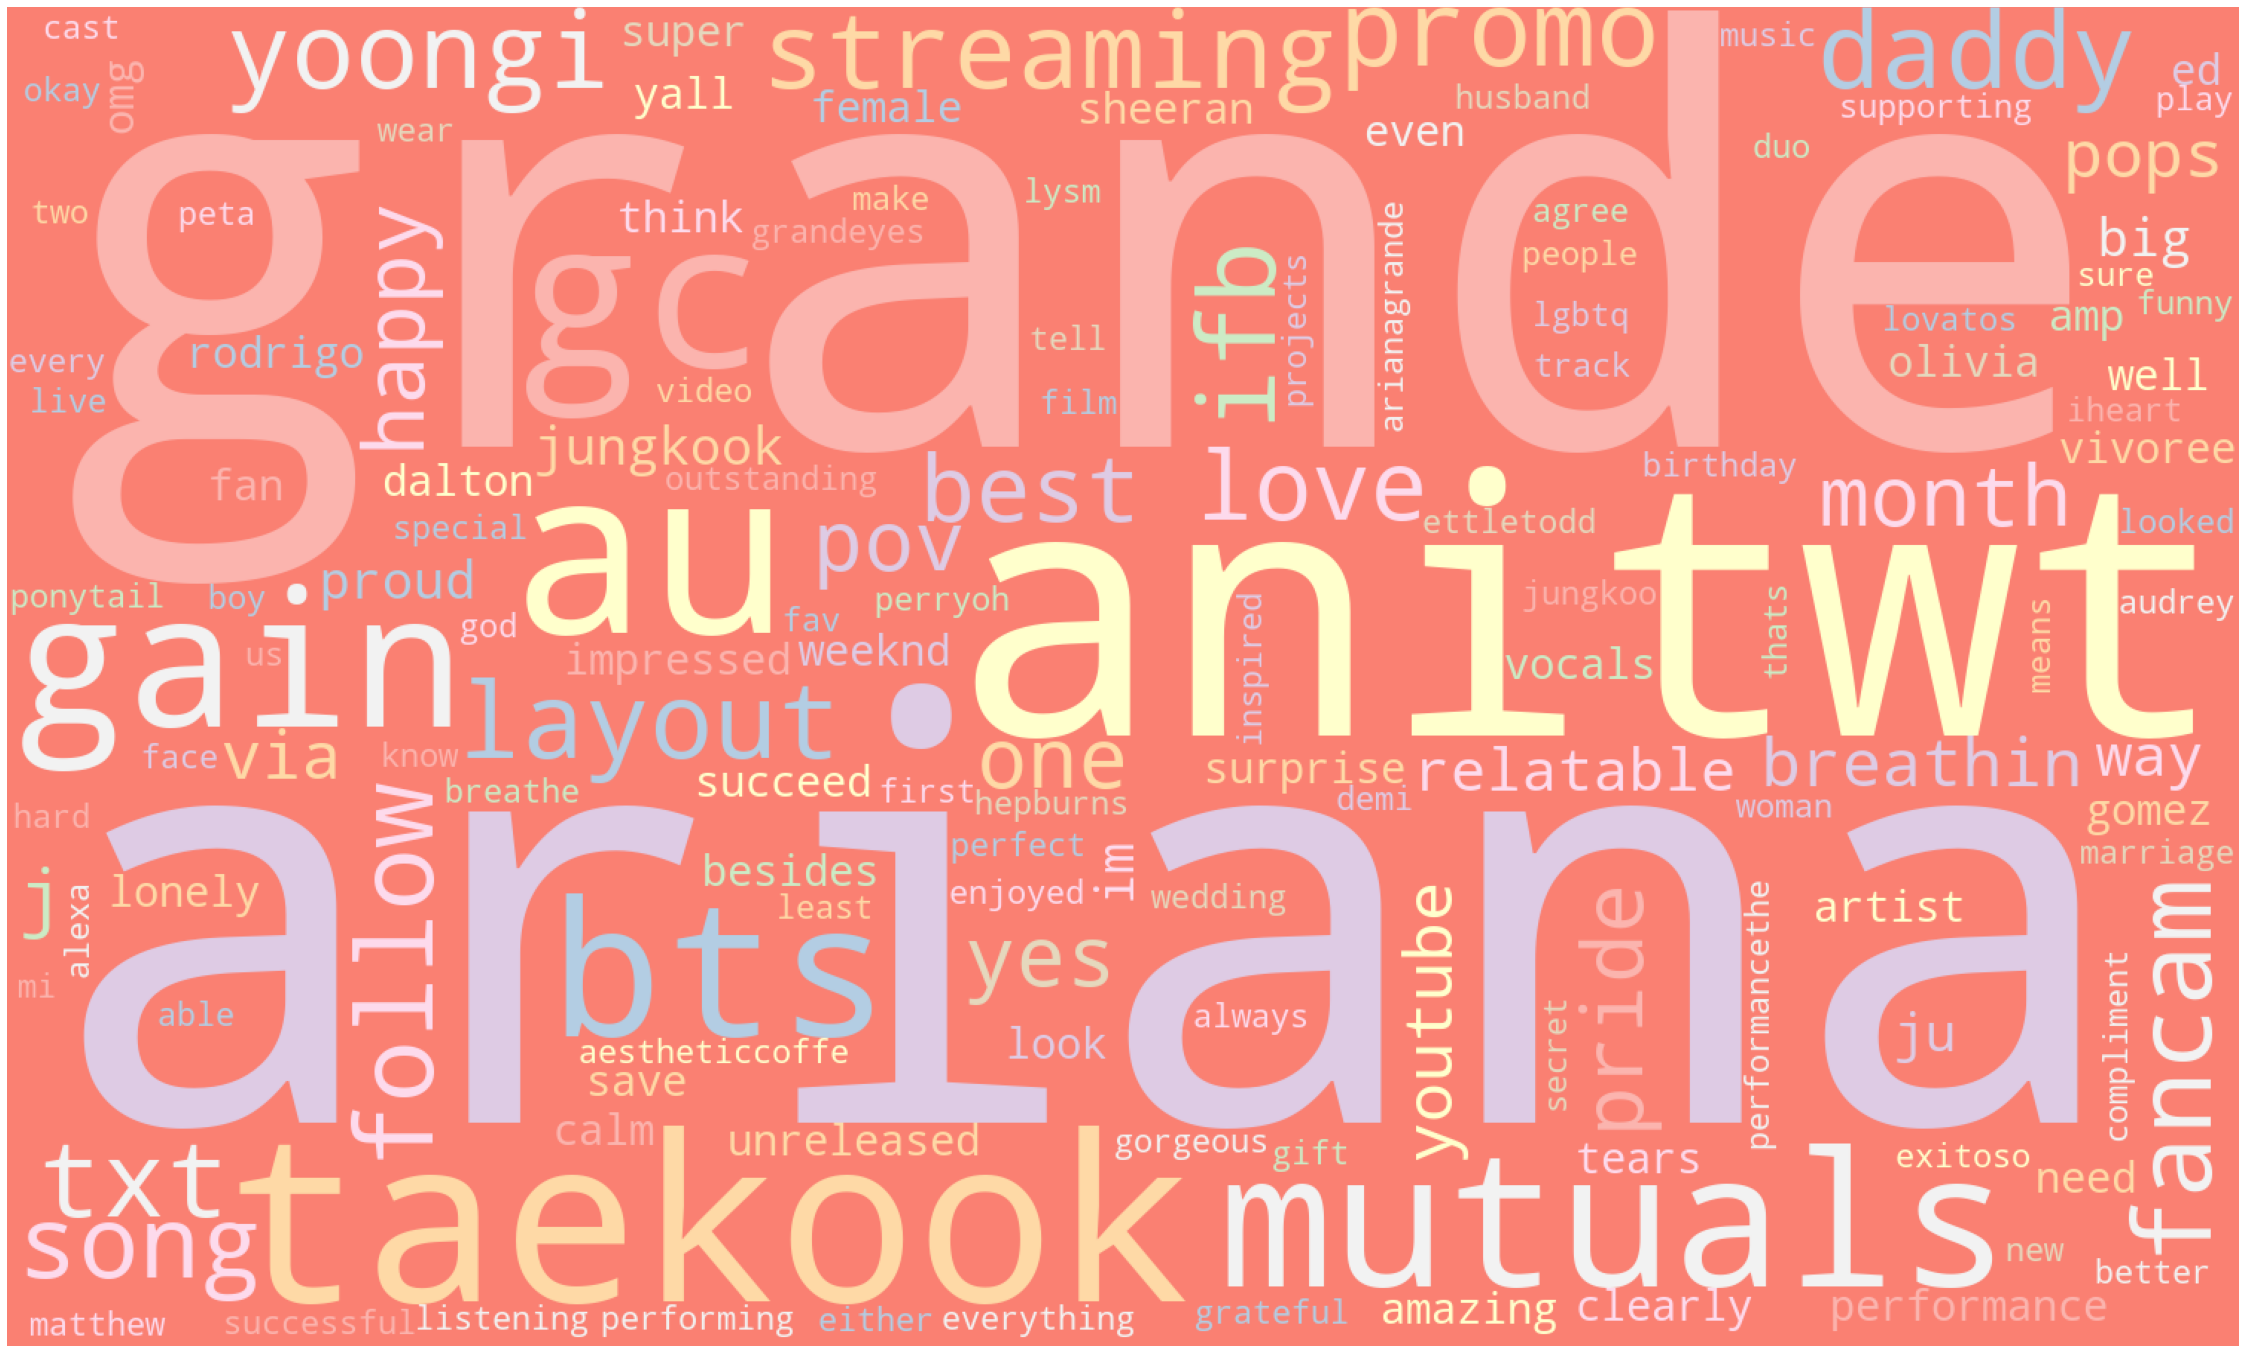

In [36]:
#What are the most popular words used in the Positive Tweets?
sep = " "  
sep = sep.join(positive_text)
      
# Generate word cloud
wordcloud2 = WordCloud(width = 1500, height = 900, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(sep)
# Plot
plot_cloud(wordcloud2)

In [37]:
#negative tweets
negativeDf = finalDf.loc[finalDf['Sentiment Vader Score'] < 0]
negativeDf

,CleanText,Sentiment Vader Score
1,needy ariana grande,-0.3400
19,breaking news ariana grande rushed hospital du...,-0.5106
21,ill forever obsessed performance,-0.5423
28,vhplaylist tears left cry ariana grande,-0.6124
39,favs bdays closest urs bitch shut cannot keep ...,-0.5859
...,...,...
665,dream met ariana grande woke started crying,-0.2732
677,idc ariana grande yall ran shit dirt,-0.7184
678,im say im sick hearing ariana grande radio,-0.5106
688,helloleesh killer _tangentt_ big_sadbitch gami...,-0.8176


In [38]:
negative_df_bag = count_vector.fit_transform(negativeDf['CleanText'])
print('The Term Frequency Matrix has %i documents (rows) and %i unique terms (columns).'%(negative_df_bag.shape[0],negative_df_bag.shape[1]))

#will be referenced later in the cosign similarity
negative_feature_names = count_vector.get_feature_names()

neg_term_frequency_table = pd.DataFrame(negative_df_bag.toarray(),columns=negative_feature_names)

#print dataframe
neg_term_frequency_table


The Term Frequency Matrix has 98 documents (rows) and 497 unique terms (columns).


,_slexx_,_tangentt_,abt,account,achieve,act,acting,addiction,addison,af,...,worry,writing,wtf,wu,wwe,yall,yami,year,years,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#create co-sign similarity table for negative value
neg_cosign_similarity_df =pd.DataFrame(cosine_similarity(neg_term_frequency_table, dense_output=True),)

#print output
neg_cosign_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,1.000000,0.365148,0.0,0.516398,0.0,0.471405,0.0,0.0,0.471405,0.516398,...,0.280056,0.408248,0.348155,0.348155,0.774597,0.436436,0.436436,0.365148,0.000000,0.408248
1,0.365148,1.000000,0.0,0.282843,0.0,0.258199,0.0,0.0,0.258199,0.282843,...,0.153393,0.223607,0.190693,0.190693,0.282843,0.239046,0.239046,0.200000,0.000000,0.223607
2,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.516398,0.282843,0.0,1.000000,0.0,0.365148,0.0,0.0,0.365148,1.000000,...,0.216930,0.316228,0.269680,0.269680,0.400000,0.338062,0.338062,0.282843,0.000000,0.474342
4,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.436436,0.239046,0.0,0.338062,0.0,0.308607,0.0,0.0,0.308607,0.338062,...,0.183340,0.267261,0.227921,0.227921,0.338062,1.000000,0.285714,0.239046,0.000000,0.267261
94,0.436436,0.239046,0.0,0.338062,0.0,0.308607,0.0,0.0,0.308607,0.338062,...,0.183340,0.267261,0.227921,0.227921,0.338062,0.285714,1.000000,0.239046,0.000000,0.267261
95,0.365148,0.200000,0.0,0.282843,0.0,0.258199,0.0,0.0,0.258199,0.282843,...,0.153393,0.223607,0.190693,0.190693,0.282843,0.239046,0.239046,1.000000,0.210819,0.223607
96,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210819,1.000000,0.000000


In [40]:
#nullify the values that are equal to .99 and greater as cosign similarity score of that magnitude means its the same tweet
for column in neg_cosign_similarity_df:
    neg_cosign_similarity_df[column] = neg_cosign_similarity_df[column].apply(lambda x: 0 if x >= 0.99 else x)

#altered dataFrame    
neg_cosign_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.000000,0.365148,0.0,0.516398,0.0,0.471405,0.0,0.0,0.471405,0.516398,...,0.280056,0.408248,0.348155,0.348155,0.774597,0.436436,0.436436,0.365148,0.000000,0.408248
1,0.365148,0.000000,0.0,0.282843,0.0,0.258199,0.0,0.0,0.258199,0.282843,...,0.153393,0.223607,0.190693,0.190693,0.282843,0.239046,0.239046,0.200000,0.000000,0.223607
2,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.516398,0.282843,0.0,0.000000,0.0,0.365148,0.0,0.0,0.365148,0.000000,...,0.216930,0.316228,0.269680,0.269680,0.400000,0.338062,0.338062,0.282843,0.000000,0.474342
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.436436,0.239046,0.0,0.338062,0.0,0.308607,0.0,0.0,0.308607,0.338062,...,0.183340,0.267261,0.227921,0.227921,0.338062,0.000000,0.285714,0.239046,0.000000,0.267261
94,0.436436,0.239046,0.0,0.338062,0.0,0.308607,0.0,0.0,0.308607,0.338062,...,0.183340,0.267261,0.227921,0.227921,0.338062,0.285714,0.000000,0.239046,0.000000,0.267261
95,0.365148,0.200000,0.0,0.282843,0.0,0.258199,0.0,0.0,0.258199,0.282843,...,0.153393,0.223607,0.190693,0.190693,0.282843,0.239046,0.239046,0.000000,0.210819,0.223607
96,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210819,0.000000,0.000000


In [41]:
#this list will contain all the positions of where the columns most similar document is located
#for example, the first position in the list where index = 0, pertains to the first document
neg_index_positions = []
for column in neg_cosign_similarity_df:
    neg_index_of_similar_doc = neg_cosign_similarity_df[column].idxmax()
    neg_index_positions.append(neg_index_of_similar_doc)

neg_index_positions

[92,
 0,
 66,
 52,
 0,
 0,
 60,
 6,
 0,
 52,
 94,
 19,
 0,
 0,
 21,
 46,
 67,
 35,
 47,
 11,
 52,
 14,
 97,
 81,
 81,
 1,
 34,
 46,
 34,
 11,
 64,
 49,
 45,
 0,
 28,
 0,
 95,
 85,
 28,
 0,
 94,
 28,
 0,
 0,
 0,
 13,
 53,
 31,
 10,
 31,
 0,
 0,
 3,
 46,
 0,
 0,
 63,
 0,
 0,
 3,
 97,
 70,
 93,
 95,
 30,
 79,
 0,
 0,
 0,
 0,
 61,
 0,
 13,
 95,
 31,
 97,
 0,
 66,
 83,
 65,
 11,
 0,
 0,
 78,
 25,
 72,
 0,
 30,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 63,
 95,
 3]

In [42]:
neg_row_positions = negativeDf.index
neg_row_positions

Int64Index([  1,  19,  21,  28,  39,  42,  47,  64,  68,  72,  82,  93,  95,
             98, 101, 108, 114, 120, 122, 130, 131, 132, 139, 140, 152, 154,
            159, 163, 168, 202, 208, 218, 223, 226, 233, 248, 252, 262, 264,
            268, 271, 272, 278, 282, 305, 306, 314, 315, 354, 364, 384, 386,
            392, 405, 416, 424, 429, 438, 441, 446, 447, 451, 470, 473, 484,
            488, 489, 492, 493, 498, 505, 507, 518, 523, 526, 538, 540, 546,
            558, 575, 591, 593, 597, 600, 608, 610, 613, 631, 634, 635, 636,
            655, 663, 665, 677, 678, 688, 692],
           dtype='int64')

In [43]:
negativeDf

,CleanText,Sentiment Vader Score
1,needy ariana grande,-0.3400
19,breaking news ariana grande rushed hospital du...,-0.5106
21,ill forever obsessed performance,-0.5423
28,vhplaylist tears left cry ariana grande,-0.6124
39,favs bdays closest urs bitch shut cannot keep ...,-0.5859
...,...,...
665,dream met ariana grande woke started crying,-0.2732
677,idc ariana grande yall ran shit dirt,-0.7184
678,im say im sick hearing ariana grande radio,-0.5106
688,helloleesh killer _tangentt_ big_sadbitch gami...,-0.8176


In [47]:
#loop through index positions to get the similar tweet
print('Co-Sign Similarity of Negative Tweets')
print('-------------------------------------')
print()

#list of the positive texts in the cosign datframe
negative_text = []
i = 0
for index in neg_index_positions:
    
    print('Sentence %i: %s'%(i+1,negativeDf['CleanText'][neg_row_positions[i]]))
    print('Sentence %i: %s'%(index+1,negativeDf['CleanText'][neg_row_positions[index]]))
    negative_text.append(negativeDf['CleanText'][neg_row_positions[index]])
    print()
    i = i +1

Co-Sign Similarity of Negative Tweets
-------------------------------------

Sentence 1: needy ariana grande
Sentence 93: needy ariana grande describes rn

Sentence 2: breaking news ariana grande rushed hospital due extreme back pain cause incident
Sentence 1: needy ariana grande

Sentence 3: ill forever obsessed performance
Sentence 67: making ariana grande account stop obsessed w personal socials

Sentence 4: vhplaylist tears left cry ariana grande
Sentence 53: ariana tears left cry

Sentence 5: favs bdays closest urs bitch shut cannot keep replying brag abt
Sentence 1: needy ariana grande

Sentence 6: ariana grande weeknd wtf insane iheartawards
Sentence 1: needy ariana grande

Sentence 7: songs get heartbreak journey olivia rodrigo shawn mendes capital
Sentence 61: songs grande fake smilethe weeknd save tears remix olivia rodrigo deja vumarina

Sentence 8: artists songs spotify streams lead act drake songs bad bunny
Sentence 7: songs get heartbreak journey olivia rodrigo shawn mend

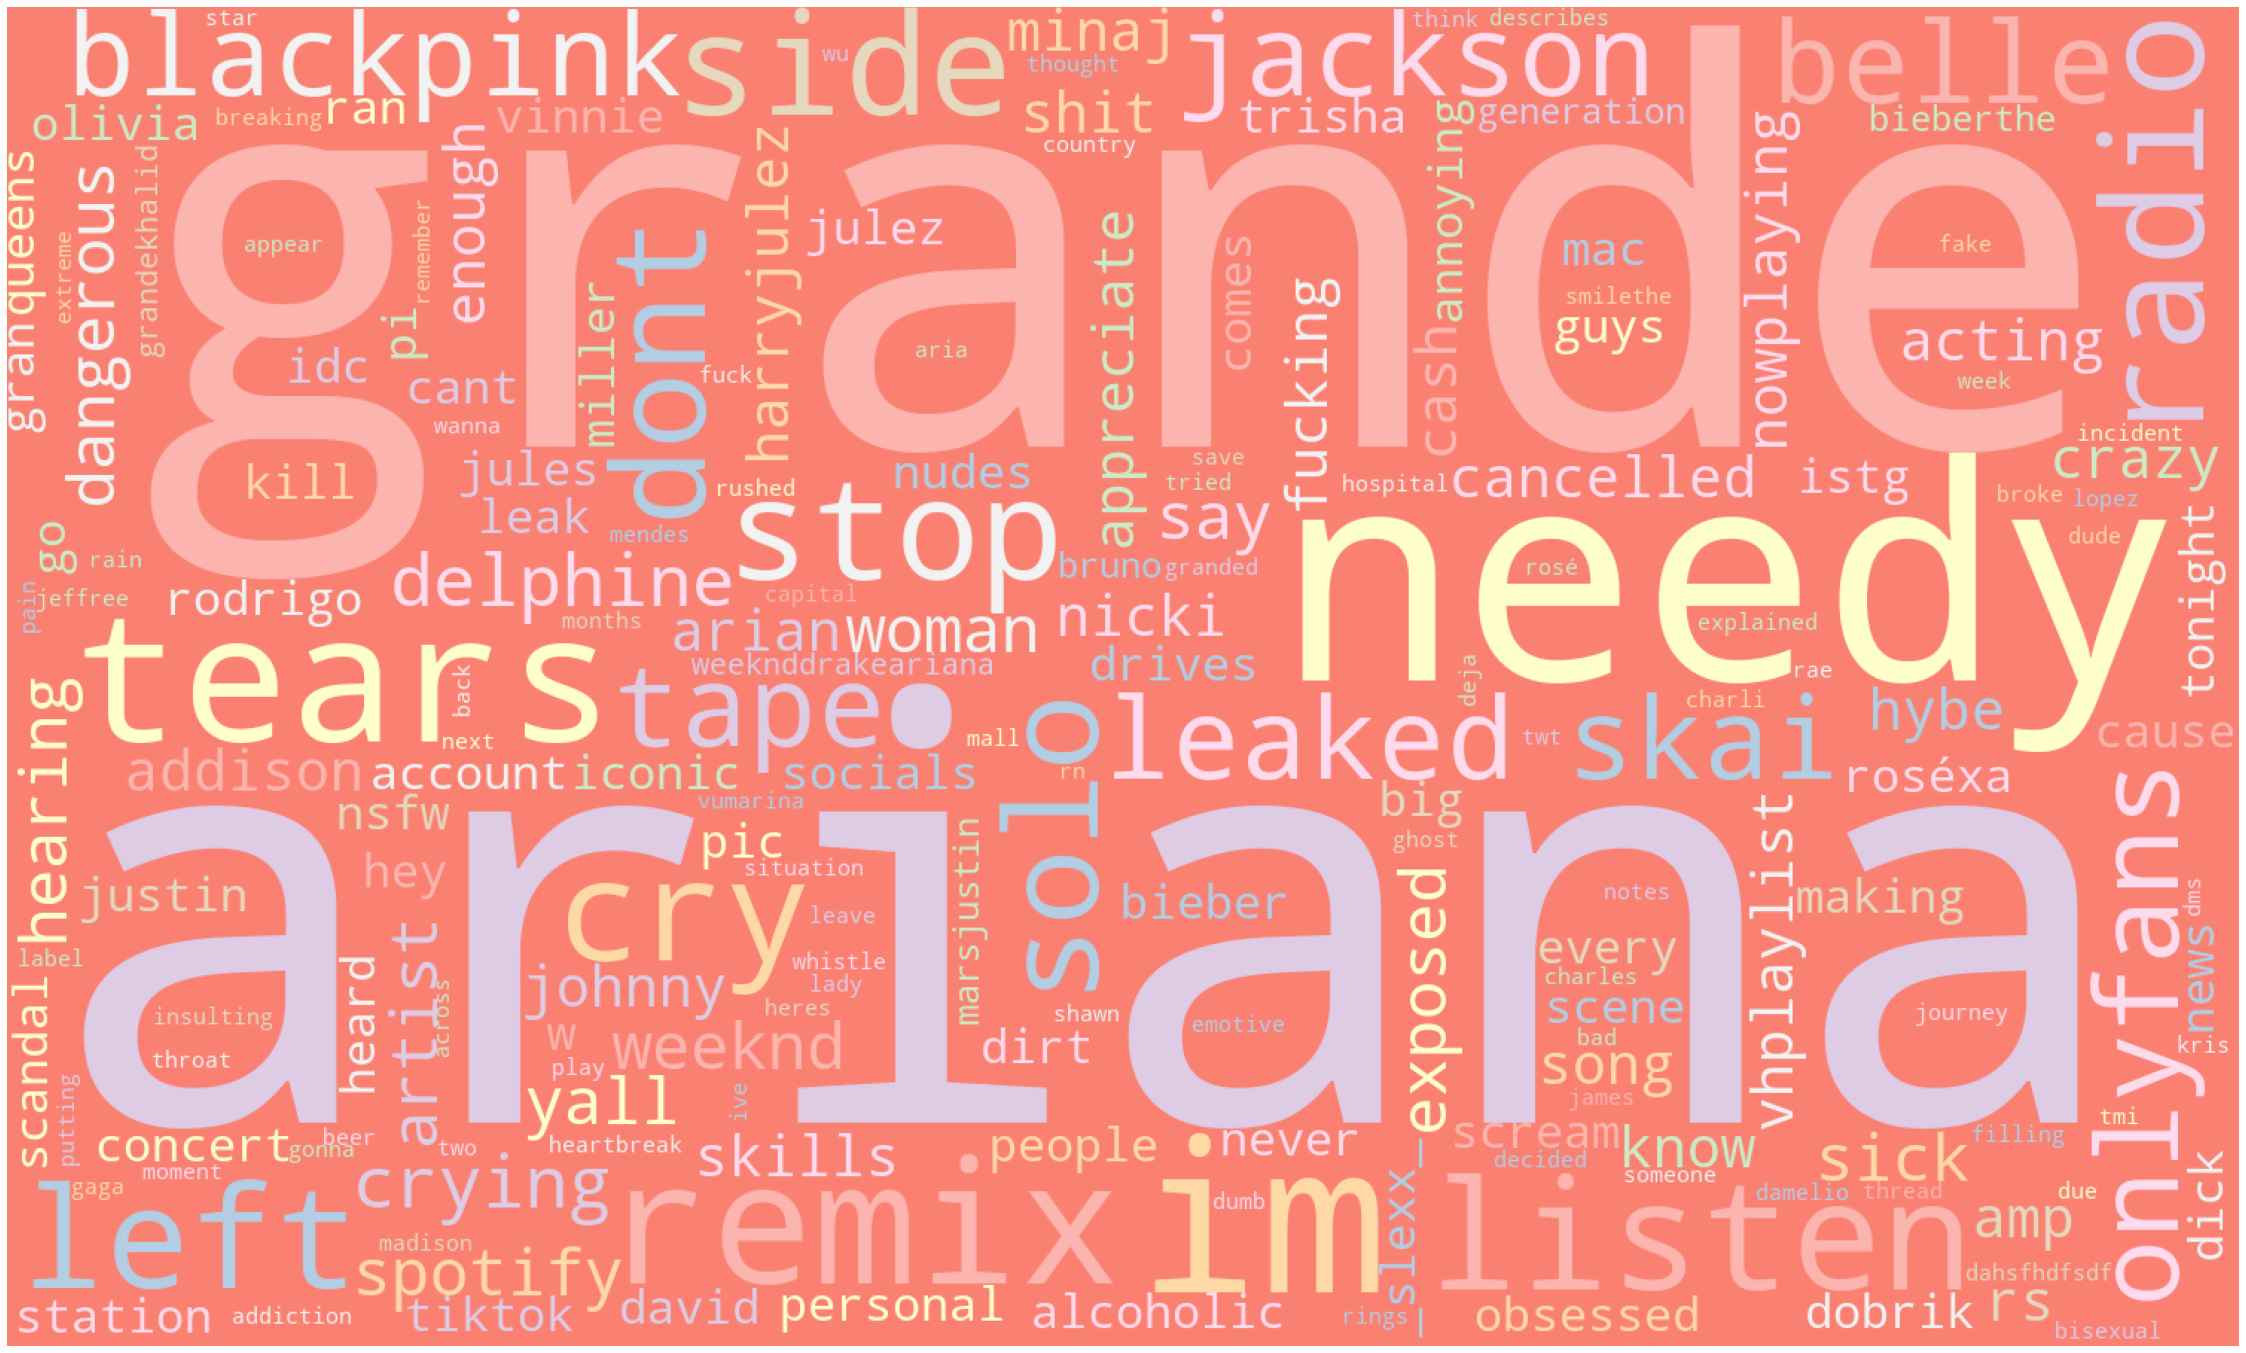

In [48]:
#What are the most popular words used in the Positive Tweets?
sep1 = " "  
sep1 = sep1.join(negative_text)
      
# Generate word cloud
wordcloud3 = WordCloud(width = 1500, height = 900, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(sep1)
# Plot
plot_cloud(wordcloud3)